In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
from sklearn.tree import plot_tree

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("indiancrop.csv")
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


# EDA

In [3]:
# Finding Null Values
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

<Figure size 1000x600 with 0 Axes>

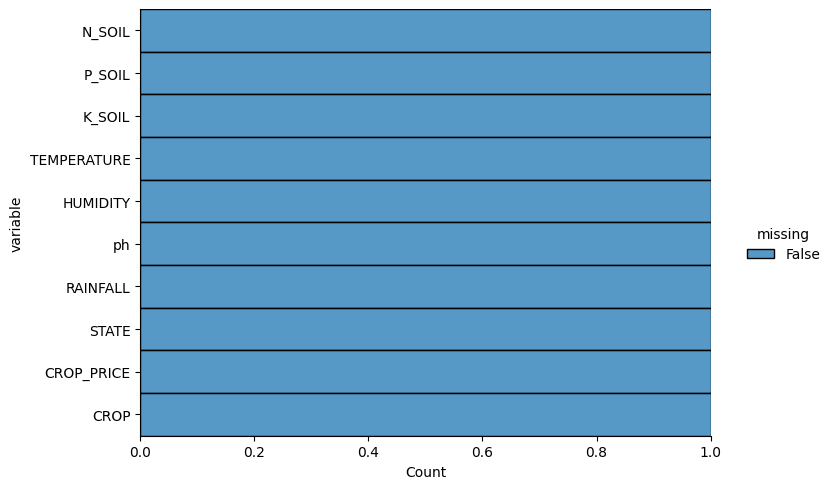

In [4]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

In [5]:
df=df.drop(["STATE","CROP_PRICE"],axis=1)
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [6]:
df.count()

N_SOIL         2200
P_SOIL         2200
K_SOIL         2200
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
CROP           2200
dtype: int64

In [7]:
df.dtypes

N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
CROP            object
dtype: object

In [8]:
df=df.rename(columns={'N_SOIL':'N','P_SOIL':'P','K_SOIL':'K'})
df.head()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [9]:
df.shape

(2200, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Since there is no null data so there is no need of replacinng it with mean or droping column**

In [11]:
df.columns

Index(['N', 'P', 'K', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP'], dtype='object')

In [12]:
df.describe()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#  Visualizing Features

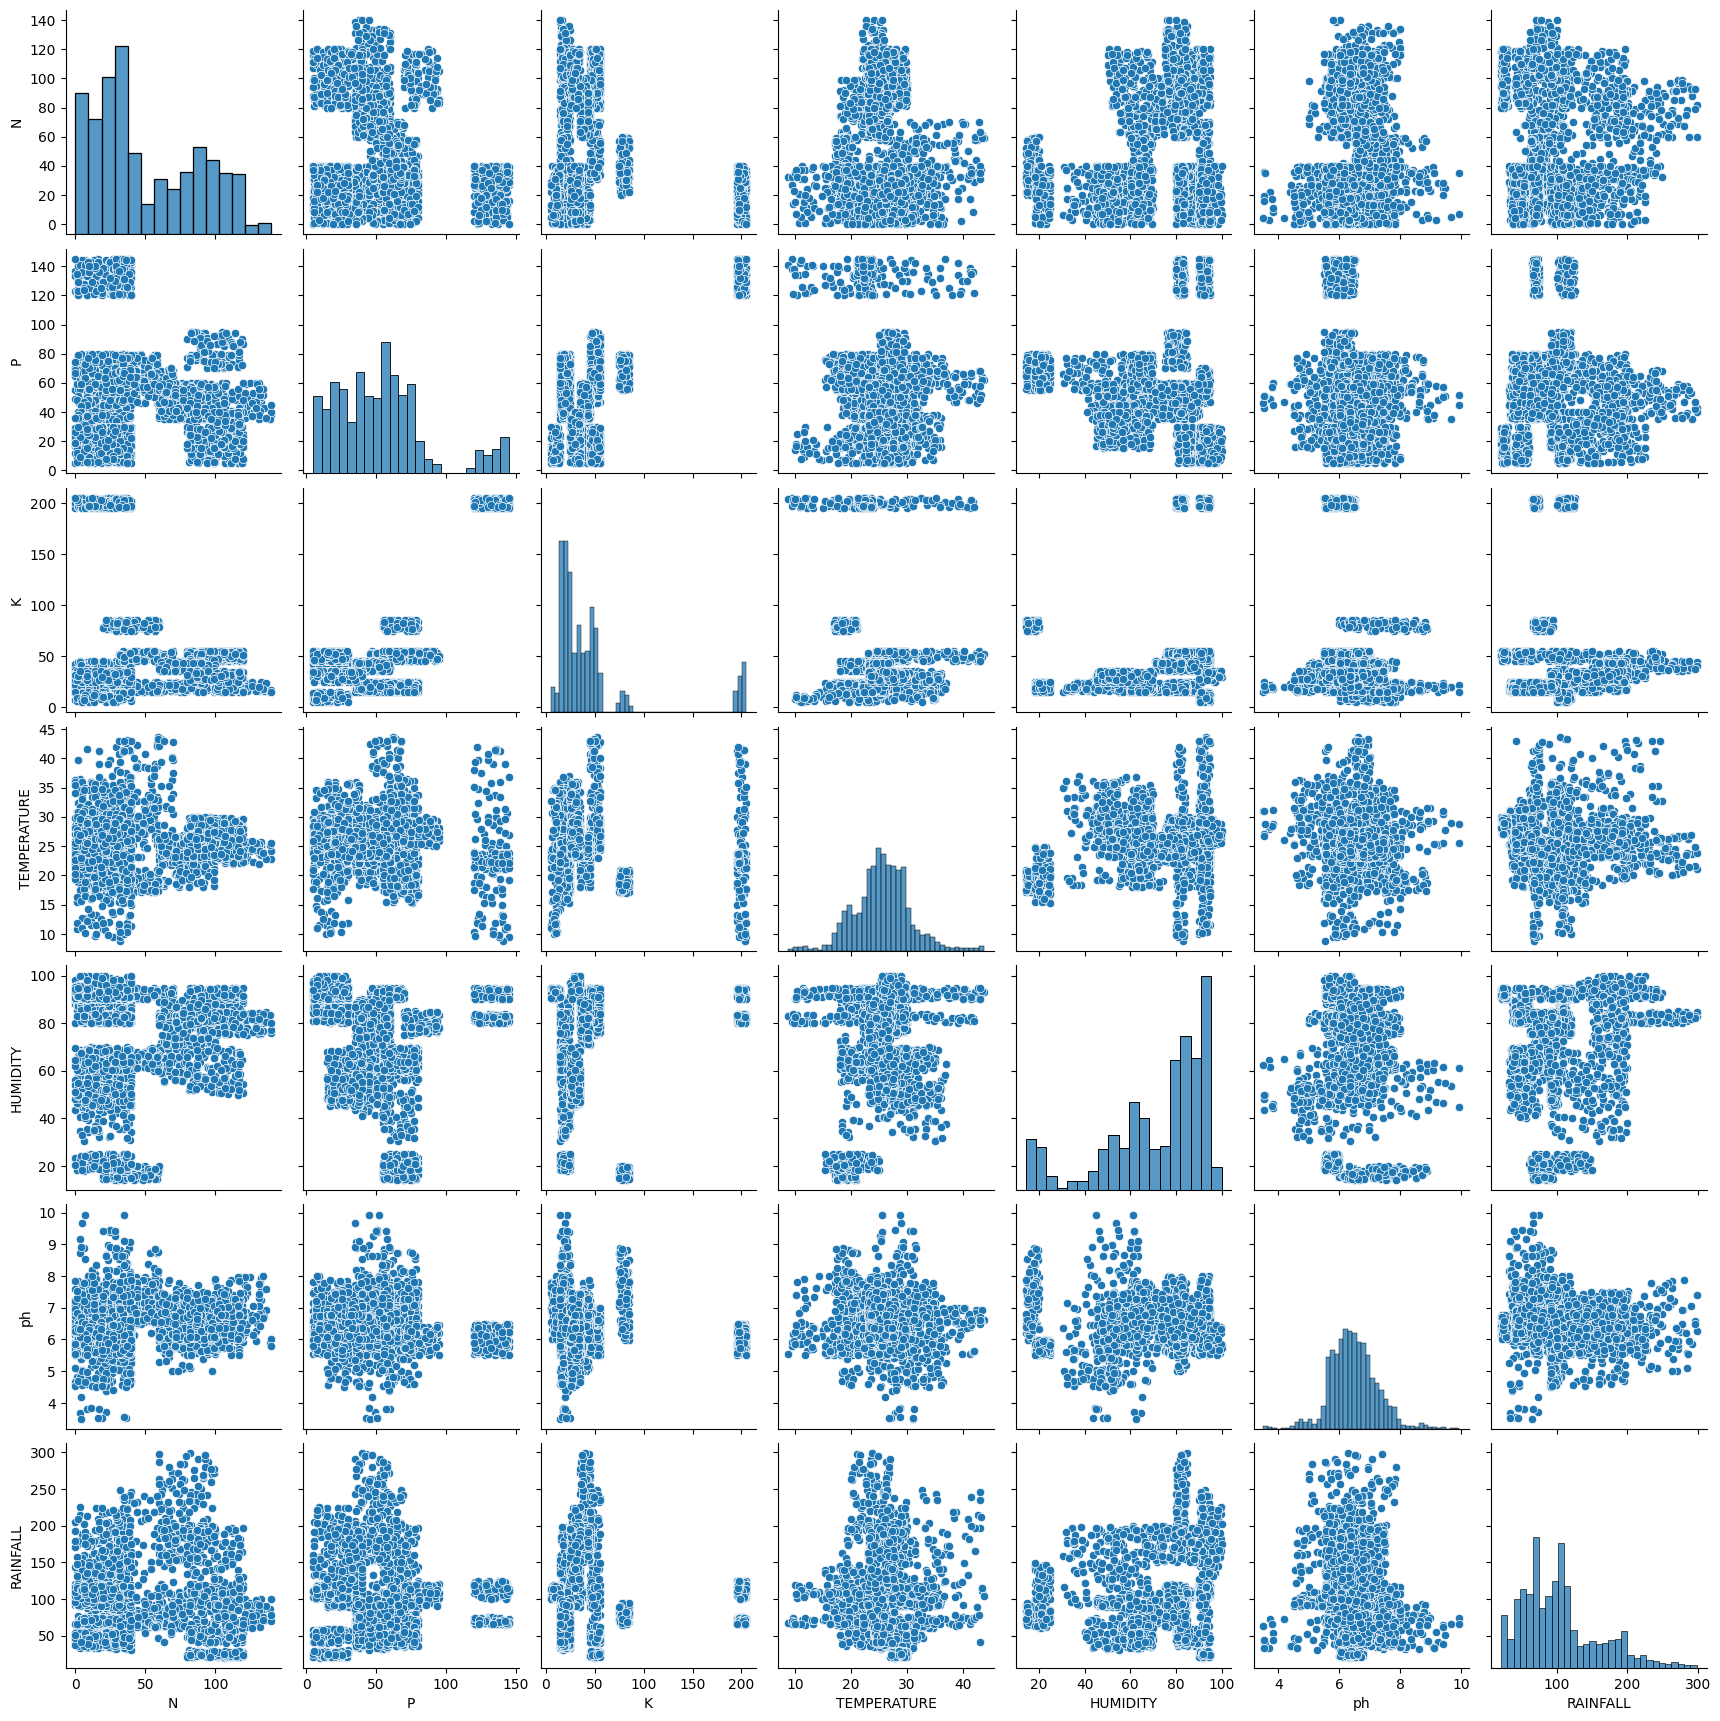

In [13]:
pair_plot=sns.pairplot(df)
pair_plot

In [14]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [15]:
df['CROP'].value_counts()

CROP
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

In [16]:
# get top 5 most frequent growing crops
n = 5
df['CROP'].value_counts()[:5].index.tolist()

['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas']

# Bar Plot for different Features

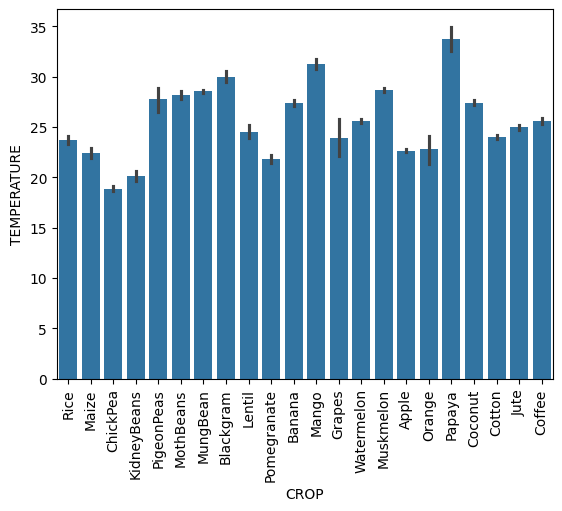

In [17]:
# Bar plot - Crop vs Temprature
sns.barplot(x="CROP", y="TEMPERATURE",data=df)
plt.xticks(rotation = 90)
plt.show()

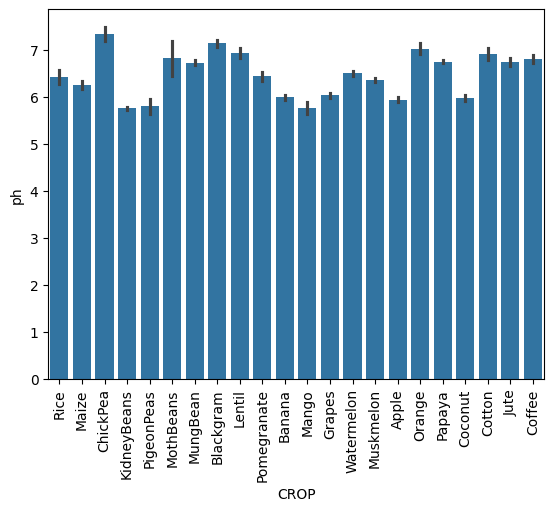

In [18]:
# Bar plot - Crop vs ph
sns.barplot(x="CROP", y="ph",data=df)
plt.xticks(rotation = 90)
plt.show()

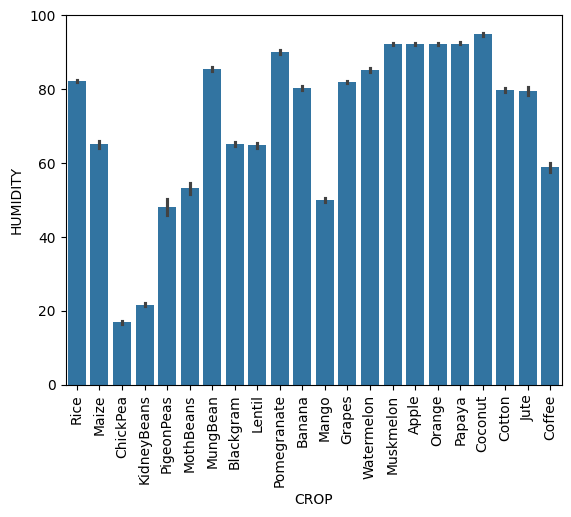

In [19]:
# Bar plot - Crop vs Humidity
sns.barplot(x="CROP", y="HUMIDITY",data=df)
plt.xticks(rotation = 90)
plt.show()

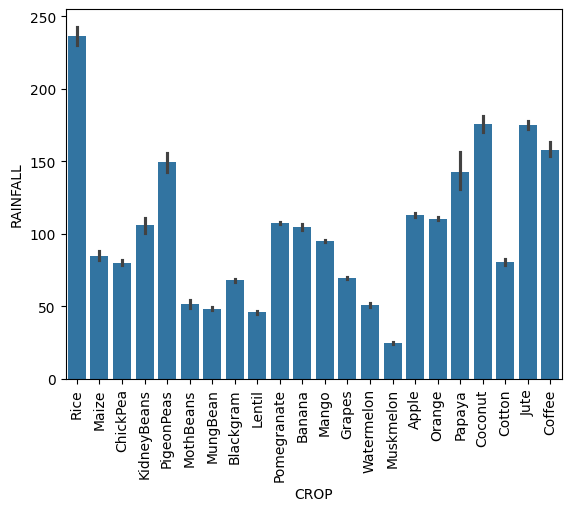

In [20]:
# Bar plot - Crop vs Rainfall
sns.barplot(x="CROP", y="RAINFALL",data=df)
plt.xticks(rotation = 90)
plt.show()

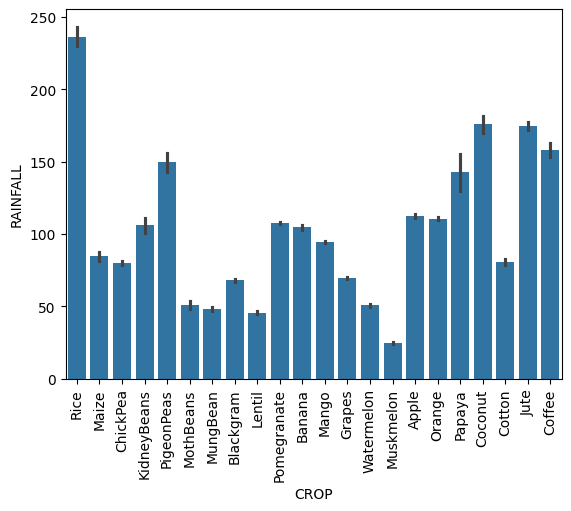

In [21]:
# Bar plot - Crop vs Rainfall
sns.barplot(x="CROP", y="RAINFALL",data=df)
plt.xticks(rotation = 90)
plt.show()

In [22]:
df.corr(numeric_only=True)

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

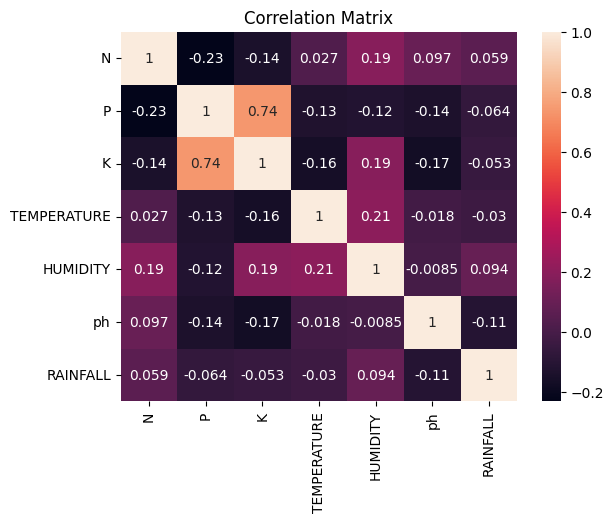

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [24]:
x=df[['N', 'P','K','TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']]
y=df["CROP"]

In [25]:
x.head()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [26]:
y.head()

0    Rice
1    Rice
2    Rice
3    Rice
4    Rice
Name: CROP, dtype: object

In [27]:
y = pd.get_dummies(y)
y

,Apple,Banana,Blackgram,ChickPea,Coconut,Coffee,Cotton,Grapes,Jute,KidneyBeans,...,Mango,MothBeans,MungBean,Muskmelon,Orange,Papaya,PigeonPeas,Pomegranate,Rice,Watermelon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Numeric columns
num_col = df.select_dtypes(include=[np.number])
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(num_col)
scaled_data = model.transform(num_col)
scaled_df = pd.DataFrame(scaled_data, columns=['N', 'P', 'K', 'TEMPERATURE','HUMIDITY','ph','RAINFALL'])
scaled_df.head()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


# Classification
**Logistic Regression** <br>
**Decision Tree Classifier** <br>
**Random Forest** <br>
**K-Nearest Neighbour(KNN)** <br>
**Gaussian Naive Bayes** <br>
**Support Vector Machine** <br>
**Extra Tree Classifier(ETC)**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Encoding categorical target variable "CROP"
label_encoder = LabelEncoder()
df["CROP"] = label_encoder.fit_transform(df["CROP"])

# Split features and target variable
X = df.drop(columns=["CROP"])
y = df["CROP"]

X_scaled = scaler.fit_transform(X)
# Spliting into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1540, 7), (660, 7), (1540,), (660,))

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

# Model Training and Evaluation
model_LR = LogisticRegression(max_iter=500, random_state=42)
model_LR.fit(X_train, y_train)

# Predictions
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

# Evaluation Metrics
metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    "Precision": [precision_score(y_train, y_train_pred, average='weighted'), precision_score(y_test, y_test_pred, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')]
}

# Display metrics
metrics_df = pd.DataFrame(metrics, index=["Training", "Testing"])
metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.977922,0.978333,0.977922,0.977906
Testing,0.959091,0.960432,0.959091,0.958853


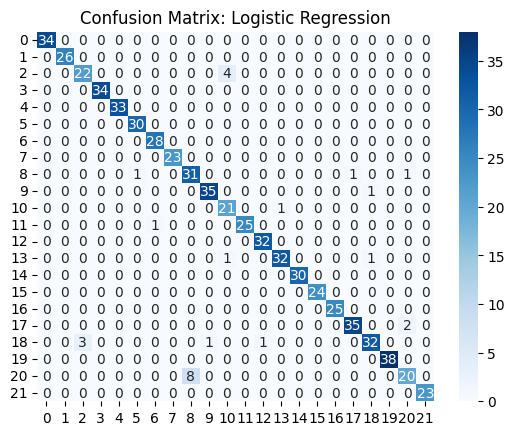

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

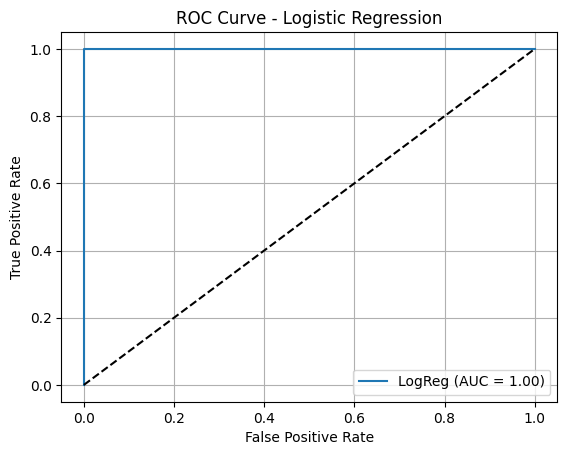

In [32]:
# Predict probabilities
y_score = model_LR.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics for Decision Tree
dt_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_dt), accuracy_score(y_test, y_test_pred_dt)],
    "Precision": [precision_score(y_train, y_train_pred_dt, average='weighted'), precision_score(y_test, y_test_pred_dt, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_dt, average='weighted'), recall_score(y_test, y_test_pred_dt, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_dt, average='weighted'), f1_score(y_test, y_test_pred_dt, average='weighted')]
}

# Display metrics for Decision Tree
dt_metrics_df = pd.DataFrame(dt_metrics, index=["Training", "Testing"])
dt_metrics_df


,Accuracy,Precision,Recall,F1-score
Training,1.000000,1.000000,1.000000,1.000000
Testing,0.986364,0.986736,0.986364,0.986273


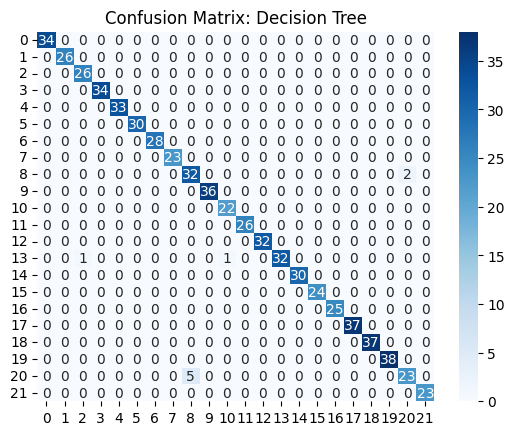

In [34]:
# Confusion Matrix
y_pred_dt = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Decision Tree")
plt.show()

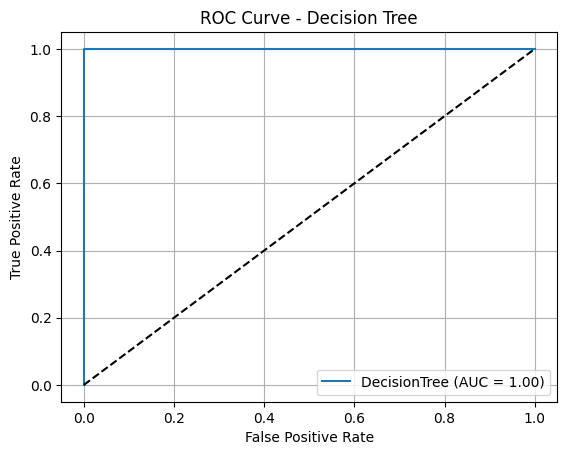

In [35]:
# Predict probabilities
y_score = dt_model.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'DecisionTree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
rf_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_rf), accuracy_score(y_test, y_test_pred_rf)],
    "Precision": [precision_score(y_train, y_train_pred_rf, average='weighted'), precision_score(y_test, y_test_pred_rf, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_rf, average='weighted'), recall_score(y_test, y_test_pred_rf, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_rf, average='weighted'), f1_score(y_test, y_test_pred_rf, average='weighted')]
}

# Display metrics for Random Forest
rf_metrics_df = pd.DataFrame(rf_metrics, index=["Training", "Testing"])
rf_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,1.000000,1.000000,1.000000,1.000000
Testing,0.992424,0.993395,0.992424,0.992312


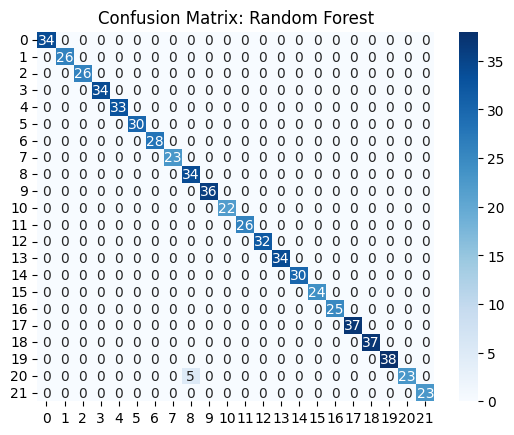

In [37]:
# Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.show()

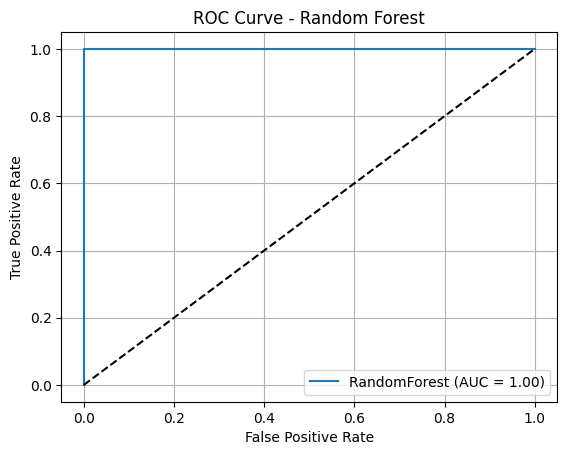

In [38]:
# Predict probabilities
y_score = rf_model.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# K-Nearest Neighbour(KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbour (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # Using 2 as a default for k
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics for KNN
knn_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_knn), accuracy_score(y_test, y_test_pred_knn)],
    "Precision": [precision_score(y_train, y_train_pred_knn, average='weighted'), precision_score(y_test, y_test_pred_knn, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_knn, average='weighted'), recall_score(y_test, y_test_pred_knn, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_knn, average='weighted'), f1_score(y_test, y_test_pred_knn, average='weighted')]
}

# Display metrics for KNN
knn_metrics_df = pd.DataFrame(knn_metrics, index=["Training", "Testing"])
knn_metrics_df


,Accuracy,Precision,Recall,F1-score
Training,0.991558,0.991813,0.991558,0.991571
Testing,0.971212,0.974125,0.971212,0.970919


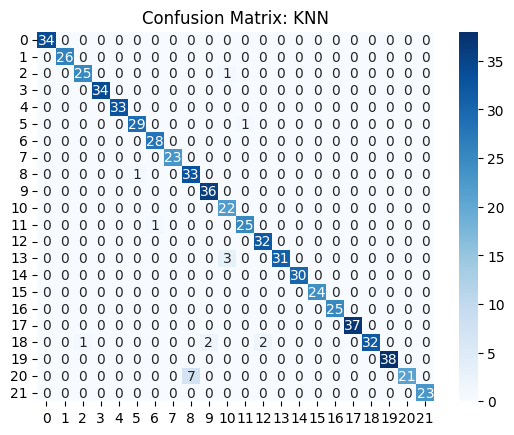

In [40]:
# Confusion Matrix
y_pred_knn = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: KNN")
plt.show()

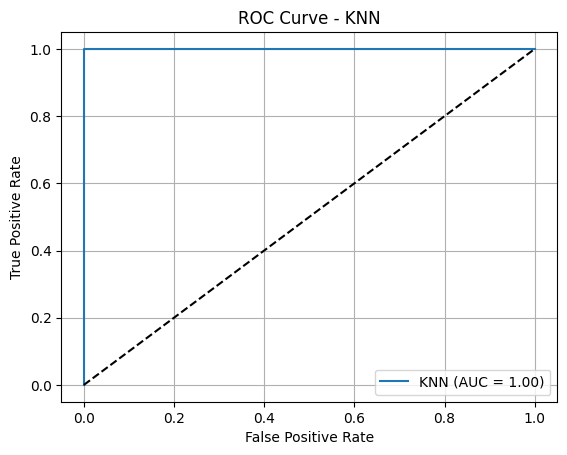

In [41]:
# Predict probabilities
y_score = knn_model.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gnb = gnb_model.predict(X_train)
y_test_pred_gnb = gnb_model.predict(X_test)

# Evaluation Metrics for Gaussian Naive Bayes
gnb_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_gnb), accuracy_score(y_test, y_test_pred_gnb)],
    "Precision": [precision_score(y_train, y_train_pred_gnb, average='weighted'), precision_score(y_test, y_test_pred_gnb, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_gnb, average='weighted'), recall_score(y_test, y_test_pred_gnb, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_gnb, average='weighted'), f1_score(y_test, y_test_pred_gnb, average='weighted')]
}

# Display metrics for Gaussian Naive Bayes
gnb_metrics_df = pd.DataFrame(gnb_metrics, index=["Training", "Testing"])
gnb_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.995455,0.995503,0.995455,0.995456
Testing,0.993939,0.994577,0.993939,0.993875


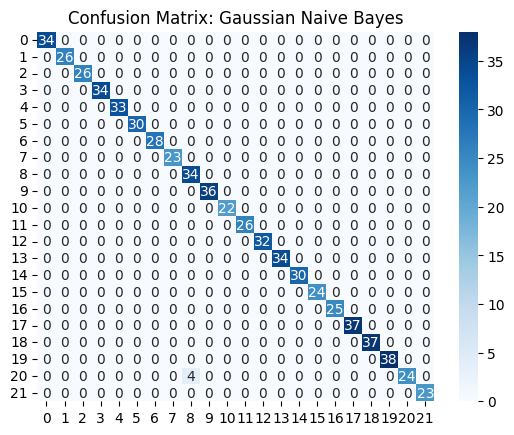

In [43]:
# Confusion Matrix
y_pred_gnb = gnb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Gaussian Naive Bayes")
plt.show()

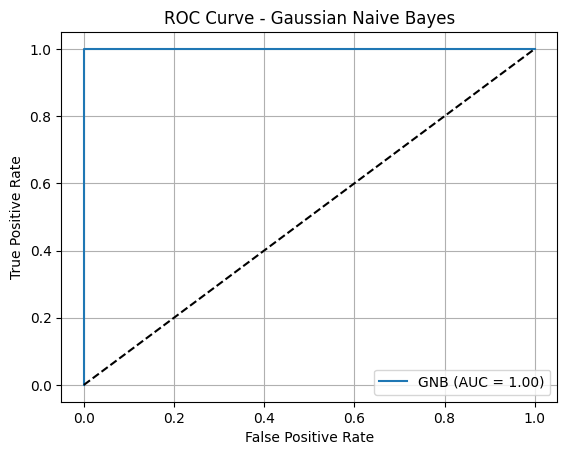

In [44]:
# Predict probabilities
y_score = gnb_model.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'GNB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Support Vector Machine

In [45]:
from sklearn.svm import SVC

# Train Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics for SVM
svm_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_svm), accuracy_score(y_test, y_test_pred_svm)],
    "Precision": [precision_score(y_train, y_train_pred_svm, average='weighted'), precision_score(y_test, y_test_pred_svm, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_svm, average='weighted'), recall_score(y_test, y_test_pred_svm, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_svm, average='weighted'), f1_score(y_test, y_test_pred_svm, average='weighted')]
}

# Display metrics for SVM
svm_metrics_df = pd.DataFrame(svm_metrics, index=["Training", "Testing"])
svm_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.988312,0.989220,0.988312,0.988344
Testing,0.971212,0.974717,0.971212,0.970793


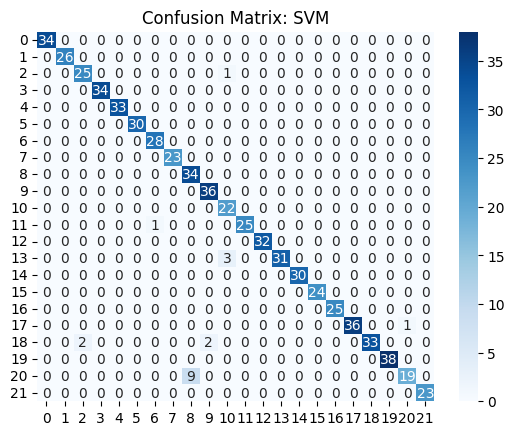

In [46]:
# Confusion Matrix
y_pred_svm = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: SVM")
plt.show()

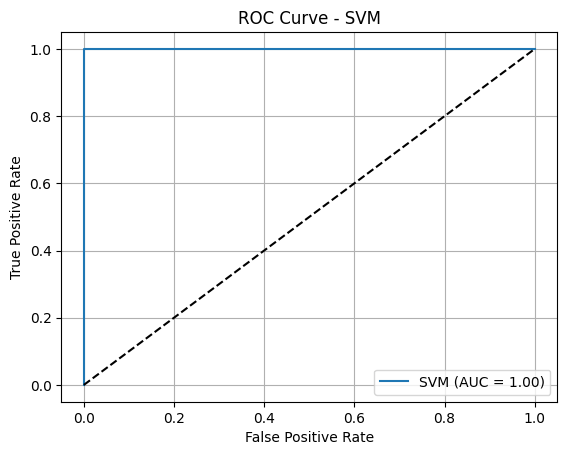

In [47]:
from sklearn.svm import SVC

# Train an SVM with probability estimation enabled
svm_model = SVC(probability=True)  
svm_model.fit(X_train, y_train)

# Now you can use your original code with just model name changes
y_score = svm_model.predict_proba(X_test)  # Works now!

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Extra Tree Classifier(ETC)

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees Classifier
etc_model = ExtraTreesClassifier(n_estimators=200, random_state=42)
etc_model.fit(X_train, y_train)

# Predictions
y_train_pred_etc = etc_model.predict(X_train)
y_test_pred_etc = etc_model.predict(X_test)

# Evaluation Metrics for Extra Trees Classifier
etc_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_etc), accuracy_score(y_test, y_test_pred_etc)],
    "Precision": [precision_score(y_train, y_train_pred_etc, average='weighted'), precision_score(y_test, y_test_pred_etc, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_etc, average='weighted'), recall_score(y_test, y_test_pred_etc, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_etc, average='weighted'), f1_score(y_test, y_test_pred_etc, average='weighted')]
}

# Display metrics for Extra Trees Classifier
etc_metrics_df = pd.DataFrame(etc_metrics, index=["Training", "Testing"])
etc_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,1.000000,1.000000,1.000000,1.000000
Testing,0.986364,0.987936,0.986364,0.986296


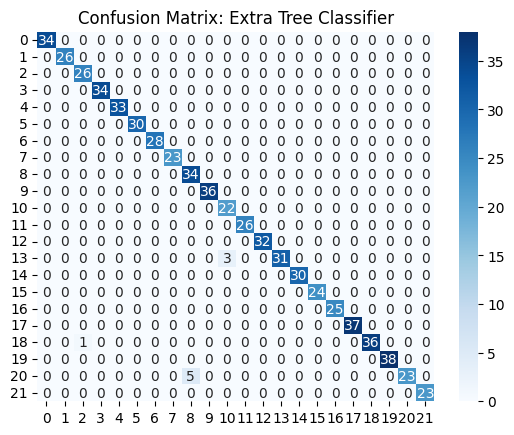

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_etc)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Extra Tree Classifier")
plt.show()

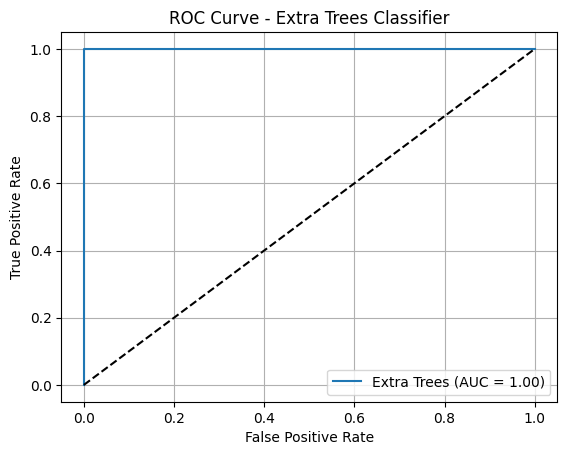

In [50]:
# Predict probabilities
y_score = etc_model.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Extra Trees (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Comparison Table

In [51]:
# Prepare a comparison table for all models based on previous output
comparison_data = {
    "Model": [
        "Extra Tree Classifier (ETC)",
        "Logistic Regression",
        "Decision Tree Classifier",
        "Random Forest",
        "K-Nearest Neighbour (KNN)",
        "Gaussian Naive Bayes",
        "Support Vector Machine (SVM)"
    ],
    "Training Accuracy": [
        etc_metrics_df.loc["Training", "Accuracy"],
        metrics_df.loc["Training", "Accuracy"],
        dt_metrics_df.loc["Training", "Accuracy"],
        rf_metrics_df.loc["Training", "Accuracy"],
        knn_metrics_df.loc["Training", "Accuracy"],
        gnb_metrics_df.loc["Training", "Accuracy"],
        svm_metrics_df.loc["Training", "Accuracy"]
    ],
    "Testing Accuracy": [
        etc_metrics_df.loc["Testing", "Accuracy"],
        metrics_df.loc["Testing", "Accuracy"],
        dt_metrics_df.loc["Testing", "Accuracy"],
        rf_metrics_df.loc["Testing", "Accuracy"],
        knn_metrics_df.loc["Testing", "Accuracy"],
        gnb_metrics_df.loc["Testing", "Accuracy"],
        svm_metrics_df.loc["Testing", "Accuracy"]
    ],
    "Training Precision": [
        etc_metrics_df.loc["Training", "Precision"],
        metrics_df.loc["Training", "Precision"],
        dt_metrics_df.loc["Training", "Precision"],
        rf_metrics_df.loc["Training", "Precision"],
        knn_metrics_df.loc["Training", "Precision"],
        gnb_metrics_df.loc["Training", "Precision"],
        svm_metrics_df.loc["Training", "Precision"]
    ],
    "Testing Precision": [
        etc_metrics_df.loc["Testing", "Precision"],
        metrics_df.loc["Testing", "Precision"],
        dt_metrics_df.loc["Testing", "Precision"],
        rf_metrics_df.loc["Testing", "Precision"],
        knn_metrics_df.loc["Testing", "Precision"],
        gnb_metrics_df.loc["Testing", "Precision"],
        svm_metrics_df.loc["Testing", "Precision"]
    ],
    "Training Recall": [
        etc_metrics_df.loc["Training", "Recall"],
        metrics_df.loc["Training", "Recall"],
        dt_metrics_df.loc["Training", "Recall"],
        rf_metrics_df.loc["Training", "Recall"],
        knn_metrics_df.loc["Training", "Recall"],
        gnb_metrics_df.loc["Training", "Recall"],
        svm_metrics_df.loc["Training", "Recall"]
    ],
    "Testing Recall": [
        etc_metrics_df.loc["Testing", "Recall"],
        metrics_df.loc["Testing", "Recall"],
        dt_metrics_df.loc["Testing", "Recall"],
        rf_metrics_df.loc["Testing", "Recall"],
        knn_metrics_df.loc["Testing", "Recall"],
        gnb_metrics_df.loc["Testing", "Recall"],
        svm_metrics_df.loc["Testing", "Recall"]
    ],
    "Training F1-score": [
        etc_metrics_df.loc["Training", "F1-score"],
        metrics_df.loc["Training", "F1-score"],
        dt_metrics_df.loc["Training", "F1-score"],
        rf_metrics_df.loc["Training", "F1-score"],
        knn_metrics_df.loc["Training", "F1-score"],
        gnb_metrics_df.loc["Training", "F1-score"],
        svm_metrics_df.loc["Training", "F1-score"]
    ],
    "Testing F1-score": [
        etc_metrics_df.loc["Testing", "F1-score"],
        metrics_df.loc["Testing", "F1-score"],
        dt_metrics_df.loc["Testing", "F1-score"],
        rf_metrics_df.loc["Testing", "F1-score"],
        knn_metrics_df.loc["Testing", "F1-score"],
        gnb_metrics_df.loc["Testing", "F1-score"],
        svm_metrics_df.loc["Testing", "F1-score"]
    ]
}

# Create a DataFrame for the comparison table
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index("Model", inplace=True)

print("Comparison Table for Training and Testing Performance of All Models:")
comparison_df

Comparison Table for Training and Testing Performance of All Models:


,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score
Model,,,,,,,,
Extra Tree Classifier (ETC),1.000000,0.986364,1.000000,0.987936,1.000000,0.986364,1.000000,0.986296
Logistic Regression,0.977922,0.959091,0.978333,0.960432,0.977922,0.959091,0.977906,0.958853
Decision Tree Classifier,1.000000,0.986364,1.000000,0.986736,1.000000,0.986364,1.000000,0.986273
Random Forest,1.000000,0.992424,1.000000,0.993395,1.000000,0.992424,1.000000,0.992312
K-Nearest Neighbour (KNN),0.991558,0.971212,0.991813,0.974125,0.991558,0.971212,0.991571,0.970919
Gaussian Naive Bayes,0.995455,0.993939,0.995503,0.994577,0.995455,0.993939,0.995456,0.993875
Support Vector Machine (SVM),0.988312,0.971212,0.989220,0.974717,0.988312,0.971212,0.988344,0.970793


# Model vs Accuracy

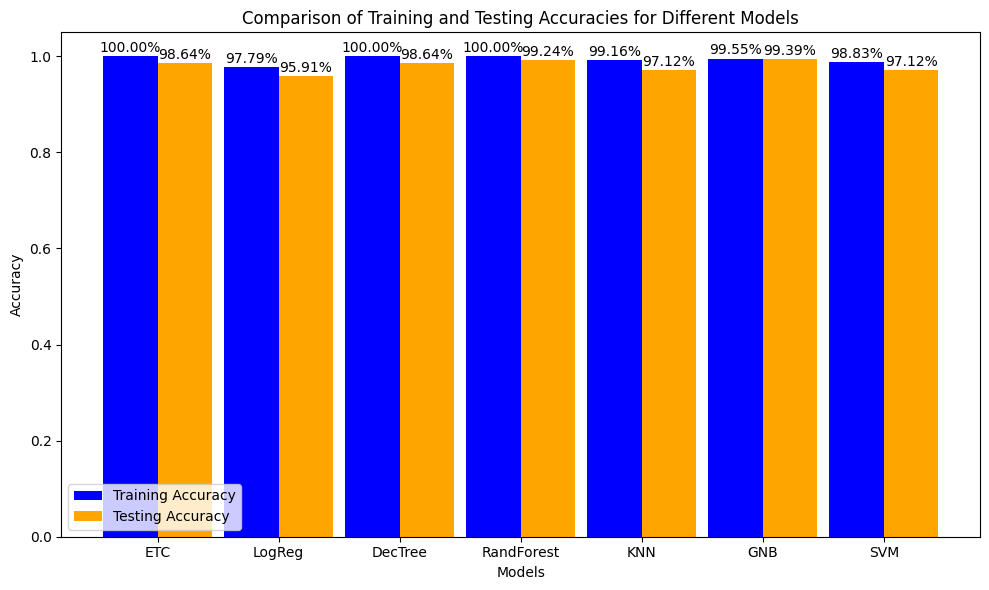

In [52]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
models = [
    "ETC", "LogReg", "DecTree", "RandForest", "KNN", "GNB", "SVM"
]
training_accuracies = [
    etc_metrics_df.loc["Training", "Accuracy"],
    metrics_df.loc["Training", "Accuracy"],
    dt_metrics_df.loc["Training", "Accuracy"],
    rf_metrics_df.loc["Training", "Accuracy"],
    knn_metrics_df.loc["Training", "Accuracy"],
    gnb_metrics_df.loc["Training", "Accuracy"],
    svm_metrics_df.loc["Training", "Accuracy"]
]
testing_accuracies = [
    etc_metrics_df.loc["Testing", "Accuracy"],
    metrics_df.loc["Testing", "Accuracy"],
    dt_metrics_df.loc["Testing", "Accuracy"],
    rf_metrics_df.loc["Testing", "Accuracy"],
    knn_metrics_df.loc["Testing", "Accuracy"],
    gnb_metrics_df.loc["Testing", "Accuracy"],
    svm_metrics_df.loc["Testing", "Accuracy"]
]

# Plot comparison bar graph for accuracies
x = range(len(models))
width = 0.45  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar([i - width / 2 for i in x], training_accuracies, width, label='Training Accuracy', color='blue')
bar2 = ax.bar([i + width / 2 for i in x], testing_accuracies, width, label='Testing Accuracy', color='orange')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show percentage on bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Comparison Table of Testing Performance

In [53]:
# Prepare a comparison table for all models based on previous output
comparison_data = {
    "Model": [
        "Extra Tree Classifier (ETC)",
        "Logistic Regression",
        "Decision Tree Classifier",
        "Random Forest",
        "K-Nearest Neighbour (KNN)",
        "Gaussian Naive Bayes",
        "Support Vector Machine (SVM)"
    ],
    "Accuracy": [
        etc_metrics_df.loc["Testing", "Accuracy"],
        metrics_df.loc["Testing", "Accuracy"],
        dt_metrics_df.loc["Testing", "Accuracy"],
        rf_metrics_df.loc["Testing", "Accuracy"],
        knn_metrics_df.loc["Testing", "Accuracy"],
        gnb_metrics_df.loc["Testing", "Accuracy"],
        svm_metrics_df.loc["Testing", "Accuracy"]
    ],
    "Precision": [
        etc_metrics_df.loc["Testing", "Precision"],
        metrics_df.loc["Testing", "Precision"],
        dt_metrics_df.loc["Testing", "Precision"],
        rf_metrics_df.loc["Testing", "Precision"],
        knn_metrics_df.loc["Testing", "Precision"],
        gnb_metrics_df.loc["Testing", "Precision"],
        svm_metrics_df.loc["Testing", "Precision"]
    ],
    "Recall": [
        etc_metrics_df.loc["Testing", "Recall"],
        metrics_df.loc["Testing", "Recall"],
        dt_metrics_df.loc["Testing", "Recall"],
        rf_metrics_df.loc["Testing", "Recall"],
        knn_metrics_df.loc["Testing", "Recall"],
        gnb_metrics_df.loc["Testing", "Recall"],
        svm_metrics_df.loc["Testing", "Recall"]
    ],
    "F1-score": [
        etc_metrics_df.loc["Testing", "F1-score"],
        metrics_df.loc["Testing", "F1-score"],
        dt_metrics_df.loc["Testing", "F1-score"],
        rf_metrics_df.loc["Testing", "F1-score"],
        knn_metrics_df.loc["Testing", "F1-score"],
        gnb_metrics_df.loc["Testing", "F1-score"],
        svm_metrics_df.loc["Testing", "F1-score"]
    ]
}

# Create a DataFrame for the comparison table
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index("Model", inplace=True)

print("Comparison Table for Testing Performance of All Models:")
comparison_df

Comparison Table for Testing Performance of All Models:


,Accuracy,Precision,Recall,F1-score
Model,,,,
Extra Tree Classifier (ETC),0.986364,0.987936,0.986364,0.986296
Logistic Regression,0.959091,0.960432,0.959091,0.958853
Decision Tree Classifier,0.986364,0.986736,0.986364,0.986273
Random Forest,0.992424,0.993395,0.992424,0.992312
K-Nearest Neighbour (KNN),0.971212,0.974125,0.971212,0.970919
Gaussian Naive Bayes,0.993939,0.994577,0.993939,0.993875
Support Vector Machine (SVM),0.971212,0.974717,0.971212,0.970793


# Model vs Accuracy for Testing Performance

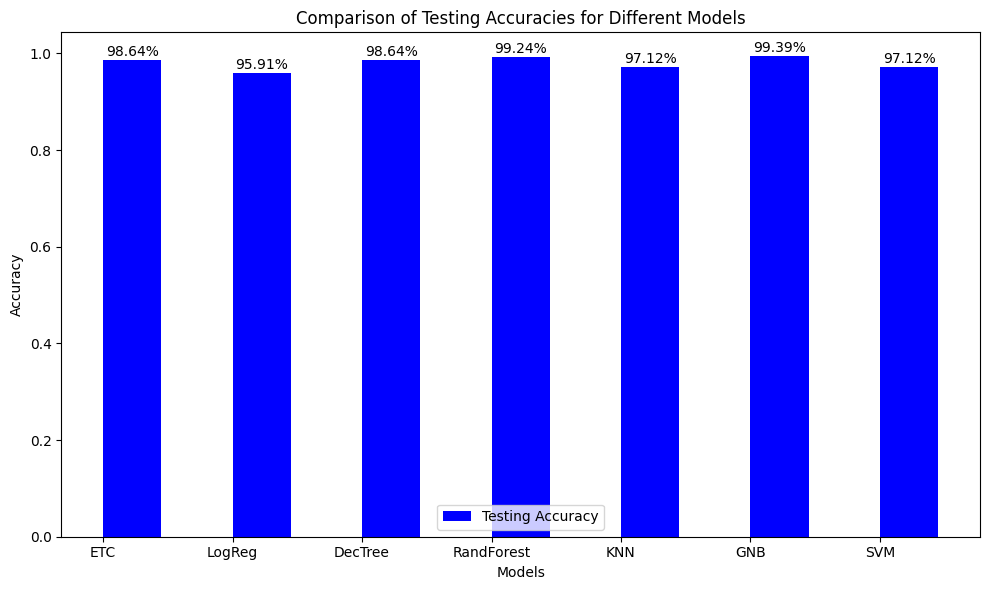

In [54]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
models = [
    "ETC", "LogReg", "DecTree", "RandForest", "KNN", "GNB", "SVM"
]
testing_accuracies = [
    etc_metrics_df.loc["Testing", "Accuracy"],
    metrics_df.loc["Testing", "Accuracy"],
    dt_metrics_df.loc["Testing", "Accuracy"],
    rf_metrics_df.loc["Testing", "Accuracy"],
    knn_metrics_df.loc["Testing", "Accuracy"],
    gnb_metrics_df.loc["Testing", "Accuracy"],
    svm_metrics_df.loc["Testing", "Accuracy"]
]

# Plot comparison bar graph for accuracies
x = range(len(models))
width = 0.45  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar([i + width / 2 for i in x], testing_accuracies, width, label='Testing Accuracy', color='blue')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Testing Accuracies for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show percentage on bars
for bars in [bar1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Crop Predictive System

In [55]:
# Create and print mapping from encoded number to crop name
print("LabelCode     Crop Name")
for idx, name in enumerate(label_encoder.classes_):
    print(f"{idx:<12} -> {name}")

LabelCode     Crop Name
0            -> Apple
1            -> Banana
2            -> Blackgram
3            -> ChickPea
4            -> Coconut
5            -> Coffee
6            -> Cotton
7            -> Grapes
8            -> Jute
9            -> KidneyBeans
10           -> Lentil
11           -> Maize
12           -> Mango
13           -> MothBeans
14           -> MungBean
15           -> Muskmelon
16           -> Orange
17           -> Papaya
18           -> PigeonPeas
19           -> Pomegranate
20           -> Rice
21           -> Watermelon


In [56]:
df.head()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


# Ensemble Learning

Ensemble Performance:

Training Accuracy: 0.9993506493506493
Testing Accuracy: 0.9863636363636363


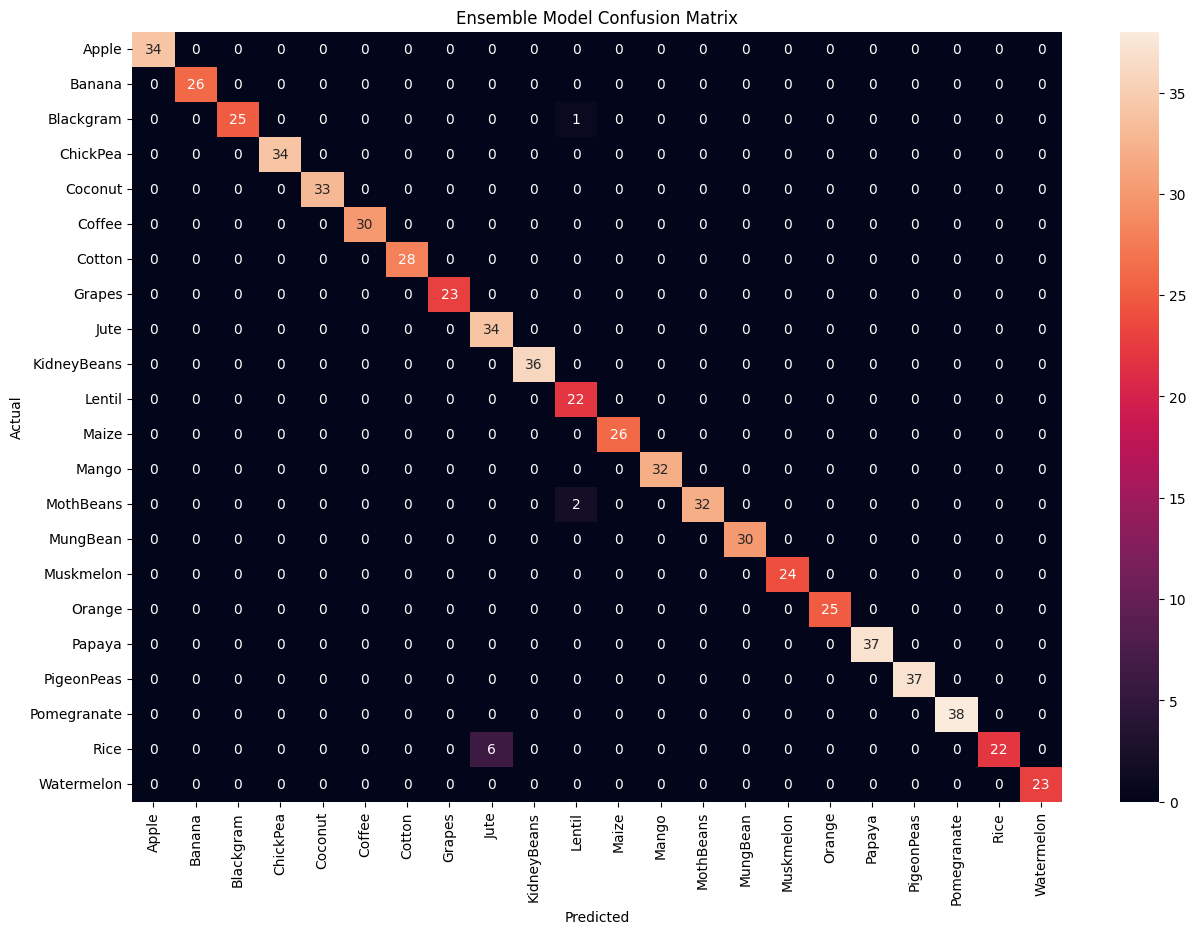

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('etc', etc_model),
        # ('log_reg', model_LR),
        # ('dt', dt_model),
        ('rf', rf_model),
        ('knn', knn_model),
        ('gnb', gnb_model),
        ('svm', svm_model)
    ],
    voting='soft'
)

# Train ensemble model
ensemble.fit(X_train, y_train)

# Evaluate
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

print("Ensemble Performance:")
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
df.head()

,N,P,K,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [59]:
import pickle
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble, file)

In [60]:
with open('scaler1.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [61]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [62]:
import numpy as np
import pandas as pd
import joblib

model = joblib.load('ensemble_model.pkl')
scaler = joblib.load('scaler1.pkl')
label_encoder = joblib.load('label_encoder.pkl')

sample_inputs = np.array([
    [90, 42, 43, 20.9, 82.0, 6.5, 202.9],         # Rice
    [71, 54, 16, 22.6, 63.7, 5.7, 87.8],          # Maize
    [40, 72, 77, 17.0, 17.0, 7.5, 88.6],          # ChickPea
    [13, 60, 25, 17.1, 20.6, 5.7, 128.3],         # KidneyBeans
    [3, 49, 18, 27.9, 64.7, 3.7, 32.7],           # PigeonPeas
    [22, 59, 23, 27.3, 51.3, 4.4, 36.5],          # MothBeans
    [19, 59, 23, 27.4, 87.8, 7.2, 54.7],          # MungBean
    [56, 79, 15, 29.5, 63.2, 7.5, 71.9],          # Blackgram
    [20, 61, 22, 23.9, 24.9, 6.0, 113.3],         # Lentil
    [2, 24, 38, 24.6, 91.6, 5.9, 112.0],          # Pomegranate
    [91, 94, 46, 29.4, 76.3, 6.1, 92.8],          # Banana
    [2, 40, 27, 29.7, 47.6, 6.0, 90.1],           # Grapes
    [39, 24, 31, 33.6, 53.7, 4.8, 98.7],          # Mango
    [119, 25, 51, 26.5, 80.9, 6.3, 53.7],         # Watermelon
    [115, 27, 48, 27.8, 93.0, 6.5, 26.3],         # Muskmelon
    [24, 128, 196, 22.8, 90.7, 5.5, 110.4],       # Apple
    [65, 45, 30, 28.0, 60.0, 6.5, 150.0],         # Cotton
    [85, 35, 50, 30.0, 75.0, 6.0, 250.0],         # Sugarcane
    [50, 30, 25, 20.0, 85.0, 5.5, 200.0],         # Coffee
    [45, 25, 20, 18.0, 80.0, 5.0, 180.0],         # Tea
    [70, 20, 40, 25.0, 70.0, 6.8, 220.0],         # Jute
    [30, 50, 20, 15.0, 50.0, 7.0, 100.0]          # Mustard
])
scaled_input = scaler.transform(sample_inputs)
predicted_labels = model.predict(scaled_input)
predicted_crop_names = label_encoder.inverse_transform(predicted_labels)

# Create a DataFrame for better display
sample_inputs_df = pd.DataFrame(sample_inputs, columns=['N', 'P', 'K', 'Temp', 'Humidity', 'pH', 'Rainfall'])
sample_inputs_df['Predicted Crop'] = predicted_crop_names

sample_inputs_df

,N,P,K,Temp,Humidity,pH,Rainfall,Predicted Crop
0,90.0,42.0,43.0,20.9,82.0,6.5,202.9,Rice
1,71.0,54.0,16.0,22.6,63.7,5.7,87.8,Maize
2,40.0,72.0,77.0,17.0,17.0,7.5,88.6,ChickPea
3,13.0,60.0,25.0,17.1,20.6,5.7,128.3,KidneyBeans
4,3.0,49.0,18.0,27.9,64.7,3.7,32.7,MothBeans
5,22.0,59.0,23.0,27.3,51.3,4.4,36.5,MothBeans
6,19.0,59.0,23.0,27.4,87.8,7.2,54.7,MungBean
7,56.0,79.0,15.0,29.5,63.2,7.5,71.9,Blackgram
8,20.0,61.0,22.0,23.9,24.9,6.0,113.3,KidneyBeans
9,2.0,24.0,38.0,24.6,91.6,5.9,112.0,Pomegranate


In [64]:
# Load the trained model, scaler, and label encoder
import joblib
import pandas as pd

model = joblib.load('ensemble_model.pkl') 
scaler = joblib.load('scaler1.pkl')
label_encoder = joblib.load('label_encoder.pkl')

def predict_production():
    print("\nEnter soil details:")
    features = [
        int(input("Nitrogen (N): ")),
        int(input("Phosphorus (P): ")),
        int(input("Potassium (K): ")),
        float(input("Temperature: ")),
        float(input("Humidity: ")),
        float(input("pH: ")),
        float(input("Rainfall: ")),
    ]
    
    # Preprocess input
    input_data = pd.DataFrame([features], columns=[
        'N', 'P', 'K', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL'
    ])
    scaled_input = scaler.transform(input_data)
    
    # Make prediction
    predicted_label = model.predict(scaled_input)[0]
    predicted_crop_name = label_encoder.inverse_transform([predicted_label])[0]
    
    print(f"\nCrop Recommended: {predicted_crop_name}")

# Prediction interface
while True:
    predict_production()
    if input("\nPredict again? (y/n): ").lower() != 'y':
        break


Enter soil details:


Nitrogen (N):  70
Phosphorus (P):  20
Potassium (K):  40
Temperature:  25
Humidity:  70
pH:  6.8
Rainfall:  220



Crop Recommended: Jute



Predict again? (y/n):  n



Crop Recommended: Rice



Predict again? (y/n):  n
